<h2 style="text-align: center;" > <strong>SBA Loand Default Prediction</strong></h2>

### Problem
The default rate for the 10-year period ending in 2008, when nearly 1 in 4 (24.7%) SBA loans weren’t paid back. It means that SBA would have loss due to Small Business couldn’t make repayment

### Goals
Being able to early detected of SBA loan default could reduce the risk of loss for Small Business Administration.

### Step of Work
**Step 3** : In this step, I would to Building Machine Learning using algorithms base tree 

In [1]:
## Import common pakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'SBA_Loan_Sample.csv')
df.head()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,sector,isFranchise,sameState,backRealEstate,Portion
0,2007,37,1,2.0,5,6,1,Y,N,39272.0,CHGOFF,20000.0,Other_no_pub,No Franchise,0,0,0.5
1,2006,41,7,1.0,0,7,1,Y,N,127500.0,CHGOFF,85000.0,Wholesale_trade,No Franchise,0,0,0.5
2,2006,27,1,1.0,0,1,1,N,N,22000.0,CHGOFF,22000.0,Trans_Ware,No Franchise,0,0,0.5
3,2006,52,3,2.0,1,3,1,N,N,35000.0,CHGOFF,25000.0,Trans_Ware,No Franchise,0,0,0.5
4,2001,13,14,1.0,14,14,1,Y,N,75011.0,CHGOFF,75000.0,Wholesale_trade,No Franchise,0,0,0.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15801 entries, 0 to 15800
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApprovalFY         15801 non-null  int64  
 1   Term               15801 non-null  int64  
 2   NoEmp              15801 non-null  int64  
 3   NewExist           15801 non-null  float64
 4   CreateJob          15801 non-null  int64  
 5   RetainedJob        15801 non-null  int64  
 6   UrbanRural         15801 non-null  int64  
 7   RevLineCr          15801 non-null  object 
 8   LowDoc             15801 non-null  object 
 9   DisbursementGross  15801 non-null  float64
 10  MIS_Status         15801 non-null  object 
 11  GrAppv             15801 non-null  float64
 12  sector             15801 non-null  object 
 13  isFranchise        15801 non-null  object 
 14  sameState          15801 non-null  int64  
 15  backRealEstate     15801 non-null  int64  
 16  Portion            158

In [4]:
## Checking for missing value
df.isnull().sum()

ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
sector               0
isFranchise          0
sameState            0
backRealEstate       0
Portion              0
dtype: int64

In [5]:
df.describe(include='O').T

,count,unique,top,freq
RevLineCr,15801,2,Y,8924
LowDoc,15801,2,N,15743
MIS_Status,15801,2,P I F,11428
sector,15801,20,Retail_trade,2627
isFranchise,15801,2,No Franchise,15320


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApprovalFY,15801.0,2005.853237,2.753119,1994.0,2004.0,2006.0,2007.0,2014.0
Term,15801.0,75.803430,49.998669,1.0,48.0,84.0,84.0,360.0
NoEmp,15801.0,7.347953,16.451361,0.0,2.0,3.0,7.0,1000.0
NewExist,15801.0,1.274160,0.446104,1.0,1.0,1.0,2.0,2.0
CreateJob,15801.0,1.725777,12.335199,0.0,0.0,0.0,1.0,454.0
RetainedJob,15801.0,5.817290,37.395862,0.0,1.0,2.0,6.0,4441.0
UrbanRural,15801.0,1.176065,0.380887,1.0,1.0,1.0,1.0,2.0
DisbursementGross,15801.0,148717.938738,279372.284521,4000.0,25991.0,58970.0,149055.0,5000000.0
GrAppv,15801.0,123349.934878,260398.484736,1000.0,25000.0,50000.0,100000.0,5000000.0
sameState,15801.0,0.347067,0.476052,0.0,0.0,0.0,1.0,1.0


In [7]:
SBA_LoanDESC = []

for i in df.columns:
    SBA_LoanDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=SBA_LoanDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,ApprovalFY,int64,0,0.0,21,"[1998, 1994]"
1,Term,int64,0,0.0,259,"[86, 277]"
2,NoEmp,int64,0,0.0,125,"[60, 95]"
3,NewExist,float64,0,0.0,2,"[2.0, 1.0]"
4,CreateJob,int64,0,0.0,62,"[13, 30]"
5,RetainedJob,int64,0,0.0,114,"[4441, 44]"
6,UrbanRural,int64,0,0.0,2,"[1, 2]"
7,RevLineCr,object,0,0.0,2,"[N, Y]"
8,LowDoc,object,0,0.0,2,"[Y, N]"
9,DisbursementGross,float64,0,0.0,7408,"[20099.0, 156686.0]"


### Data Preparation

In [8]:
## Checking for balance/ imbalance data of target
(((df['MIS_Status'].value_counts())/len(df))*100).round(2)

P I F     72.32
CHGOFF    27.68
Name: MIS_Status, dtype: float64

In [9]:
## Encoding 
df['RevLineCr'] = df['RevLineCr'].map({'N':0, 'Y':1})
df['LowDoc'] = df['LowDoc'].map({'N':0, 'Y':1})
df['MIS_Status'] = df['MIS_Status'].map({'P I F':0, 'CHGOFF':1})
df['isFranchise'] = df['isFranchise'].map({'No Franchise':0, 'Franchise':1})

In [10]:
df['NewExist'] = df['NewExist'].astype(str)

In [11]:
df['NewExist'] = df['NewExist'].map({'1.0':0, '2.0':1})

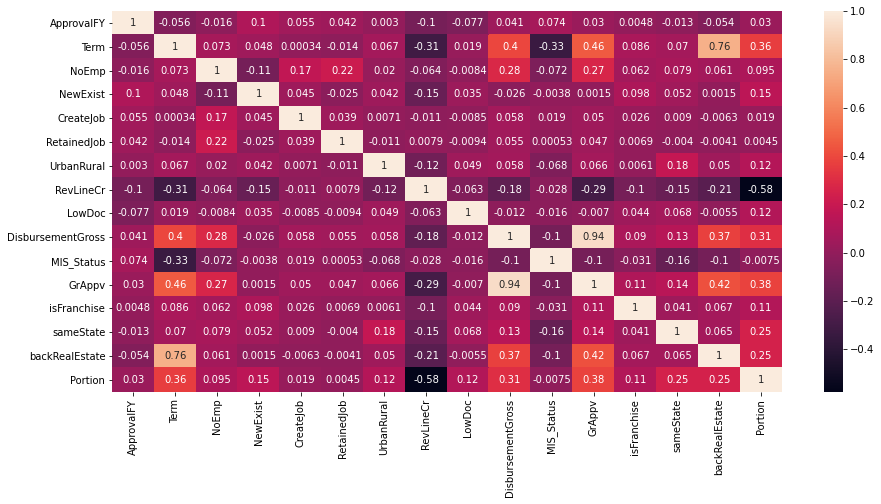

In [12]:
## Checking for correlation among features
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
##Correlation within Target
df.corr()['MIS_Status'].sort_values(ascending=False)[1:]

ApprovalFY           0.074134
CreateJob            0.018730
RetainedJob          0.000530
NewExist            -0.003774
Portion             -0.007486
LowDoc              -0.016495
RevLineCr           -0.028178
isFranchise         -0.030564
UrbanRural          -0.067941
NoEmp               -0.071968
GrAppv              -0.101722
backRealEstate      -0.103042
DisbursementGross   -0.104896
sameState           -0.159490
Term                -0.332677
Name: MIS_Status, dtype: float64

#### Feature Selection

Note :

- ApprovalFY, this feature show Fiscal year of commitment from 1984 - 2014. So, I would not use this for modeling
- Drop features that has little correlation :
  - RetainedJob
  - CreateJob
  - RevLineCr
  - LowDoc
  - Portion
  - NewExist
- DisbursementGross and GrAppv, this feature has same value -- Drop DisbursementGross
- Term and backRealEstate  -- Drop backRealEstate

In [14]:
df.columns

Index(['ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'MIS_Status',
       'GrAppv', 'sector', 'isFranchise', 'sameState', 'backRealEstate',
       'Portion'],
      dtype='object')

In [15]:
df.drop(columns=['ApprovalFY','RetainedJob','CreateJob','RevLineCr','LowDoc','DisbursementGross','NewExist', 'backRealEstate','Portion'], inplace=True)

In [16]:
## Type of features after encoding
df.dtypes

Term             int64
NoEmp            int64
UrbanRural       int64
MIS_Status       int64
GrAppv         float64
sector          object
isFranchise      int64
sameState        int64
dtype: object

In [17]:
## Encoding
## One Hot Encoding Using Pandas
df = pd.get_dummies(data=df, columns=['sector'], prefix_sep='__')

In [18]:
df.head()

,Term,NoEmp,UrbanRural,MIS_Status,GrAppv,isFranchise,sameState,sector__Accommodation_food_serv,sector__Admini_sup_and_waste_mgm_rem,sector__Ag_fores_ﬁshi_hunting,...,sector__Manufacturing,sector__Mining_quar_oil_gas_ext,sector__Other_no_pub,sector__Prof_scien_and_tech_serv,sector__Public_admin,sector__RE_rental_leasing,sector__Retail_trade,sector__Trans_Ware,sector__Utilities,sector__Wholesale_trade
0,37,1,1,1,20000.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,41,7,1,1,85000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27,1,1,1,22000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,52,3,1,1,25000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,13,14,1,1,75000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
df.columns

Index(['Term', 'NoEmp', 'UrbanRural', 'MIS_Status', 'GrAppv', 'isFranchise',
       'sameState', 'sector__Accommodation_food_serv',
       'sector__Admini_sup_and_waste_mgm_rem', 'sector__Ag_fores_ﬁshi_hunting',
       'sector__Arts_enter_recreation', 'sector__Construction',
       'sector__Educational_services', 'sector__Finance_insurance',
       'sector__Health_care_social_ass', 'sector__Information',
       'sector__Management_and_enterprises', 'sector__Manufacturing',
       'sector__Mining_quar_oil_gas_ext', 'sector__Other_no_pub',
       'sector__Prof_scien_and_tech_serv', 'sector__Public_admin',
       'sector__RE_rental_leasing', 'sector__Retail_trade',
       'sector__Trans_Ware', 'sector__Utilities', 'sector__Wholesale_trade'],
      dtype='object')

### Machine Learning Building

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn import set_config
set_config(print_changed_only=False)

## Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [21]:
x = df.drop(columns='MIS_Status') 
y = df['MIS_Status']

In [22]:
#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, train_size=.80, random_state=42)

### Base Model

#### 1. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
#fit model
modelDT.fit(x_train, y_train)
y_predDT = modelDT.predict(x_test)

In [24]:
# Evaluation Matrix for Train
y_trainDT = modelDT.predict(x_train)

acc_trainDT = accuracy_score(y_train, y_trainDT)
prec_trainDT = precision_score(y_train, y_trainDT)
rec_trainDT = recall_score(y_train, y_trainDT)
f1_trainDT =f1_score(y_train, y_trainDT)

In [25]:
# Evaluation Matrix for Test
acc_DT = accuracy_score(y_test, y_predDT)
prec_DT = precision_score(y_test, y_predDT)
rec_DT = recall_score(y_test, y_predDT)
f1_DT =f1_score(y_test, y_predDT)

print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2286
           1       0.77      0.79      0.78       875

    accuracy                           0.88      3161
   macro avg       0.85      0.85      0.85      3161
weighted avg       0.88      0.88      0.88      3161



In [26]:
DT_base = {
    'Training':[acc_trainDT, prec_trainDT, rec_trainDT, f1_trainDT],
    'Testing':[acc_DT, prec_DT, rec_DT, f1_DT]
}
pd.DataFrame(data=DT_base, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.996519,0.877254
Precision,0.999711,0.772067
Recall,0.987707,0.789714
F1-score,0.993673,0.780791


In [27]:
cm_DT = confusion_matrix(y_test, y_predDT, labels=[1,0])
df_cm_DT = pd.DataFrame(data=cm_DT, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_DT

,Pred 1,Pred 0
Akt 1,691,184
Akt 0,204,2082


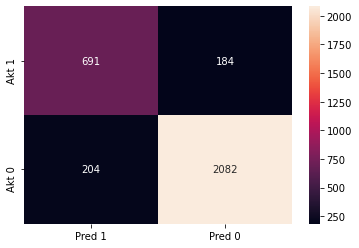

In [28]:
sns.heatmap(df_cm_DT, annot=True, fmt='g')

#### 2. Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)
y_predRF = modelRF.predict(x_test)

In [30]:
# Evaluation Matrix for Train
y_trainRF = modelRF.predict(x_train)

acc_trainRF = accuracy_score(y_train, y_trainRF)
prec_trainRF = precision_score(y_train, y_trainRF)
rec_trainRF = recall_score(y_train, y_trainRF)
f1_trainRF =f1_score(y_train, y_trainRF)

In [31]:
# Evaluation matrix for Testing
acc_RF = accuracy_score(y_test, y_predRF)
prec_RF = precision_score(y_test, y_predRF)
rec_RF = recall_score(y_test, y_predRF)
f1_RF =f1_score(y_test, y_predRF)

print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2286
           1       0.81      0.76      0.78       875

    accuracy                           0.88      3161
   macro avg       0.86      0.84      0.85      3161
weighted avg       0.88      0.88      0.88      3161



In [32]:
RF_base = {
    'Training':[acc_trainRF, prec_trainRF, rec_trainRF, f1_trainRF],
    'Testing':[acc_RF, prec_RF, rec_RF, f1_RF]
}
pd.DataFrame(data=RF_base, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.996519,0.881683
Precision,0.995126,0.805116
Recall,0.992281,0.755429
F1-score,0.993702,0.779481


In [33]:
cm_RF = confusion_matrix(y_test, y_predRF, labels=[1,0])
df_cm_RF = pd.DataFrame(data=cm_RF, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_RF

,Pred 1,Pred 0
Akt 1,661,214
Akt 0,160,2126


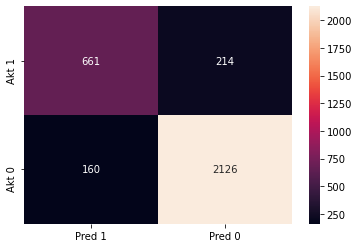

In [34]:
sns.heatmap(df_cm_RF, annot=True, fmt='g')

#### 3. XGBoost

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
modelXGB = XGBClassifier()
modelXGB.fit(x_train, y_train)
y_predXGB = modelXGB.predict(x_test)

In [37]:
# Evaluation Matrix for Train
y_trainXGB = modelXGB.predict(x_train)

acc_trainXGB = accuracy_score(y_train, y_trainXGB)
prec_trainXGB = precision_score(y_train, y_trainXGB)
rec_trainXGB = recall_score(y_train, y_trainXGB)
f1_trainXGB =f1_score(y_train, y_trainXGB)

In [38]:
# Evaluation Matrix for Testing
acc_XGB = accuracy_score(y_test, y_predXGB)
prec_XGB = precision_score(y_test, y_predXGB)
rec_XGB = recall_score(y_test, y_predXGB)
f1_XGB =f1_score(y_test, y_predXGB)

print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2286
           1       0.84      0.85      0.84       875

    accuracy                           0.91      3161
   macro avg       0.89      0.89      0.89      3161
weighted avg       0.91      0.91      0.91      3161



In [39]:
XGB_base = {
    'Training':[acc_trainXGB, prec_trainXGB, rec_trainXGB, f1_trainXGB],
    'Testing':[acc_XGB, prec_XGB, rec_XGB, f1_XGB]
}
pd.DataFrame(data=XGB_base, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.955459,0.913951
Precision,0.917972,0.843003
Recall,0.921384,0.846857
F1-score,0.919675,0.844926


In [40]:
cm_XGB = confusion_matrix(y_test, y_predXGB, labels=[1,0])
df_cm_XGB = pd.DataFrame(data=cm_XGB, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_XGB

,Pred 1,Pred 0
Akt 1,741,134
Akt 0,138,2148


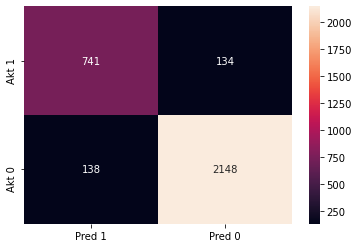

In [41]:
sns.heatmap(df_cm_XGB, annot=True, fmt='g')

### Optimize Model

#### A. Handling Imbalance Data

#### SMOTE

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [24]:
x_train_sm.columns

Index(['Term', 'NoEmp', 'UrbanRural', 'GrAppv', 'isFranchise', 'sameState',
       'sector__Accommodation_food_serv',
       'sector__Admini_sup_and_waste_mgm_rem', 'sector__Ag_fores_ﬁshi_hunting',
       'sector__Arts_enter_recreation', 'sector__Construction',
       'sector__Educational_services', 'sector__Finance_insurance',
       'sector__Health_care_social_ass', 'sector__Information',
       'sector__Management_and_enterprises', 'sector__Manufacturing',
       'sector__Mining_quar_oil_gas_ext', 'sector__Other_no_pub',
       'sector__Prof_scien_and_tech_serv', 'sector__Public_admin',
       'sector__RE_rental_leasing', 'sector__Retail_trade',
       'sector__Trans_Ware', 'sector__Utilities', 'sector__Wholesale_trade'],
      dtype='object')

#### 1. Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

modelDT_sm = DecisionTreeClassifier()
#fit model
modelDT_sm.fit(x_train_sm, y_train_sm)
y_predDT_sm = modelDT_sm.predict(x_test)

In [59]:
# Evaluation Matrix for Train
y_trainDT_sm = modelDT_sm.predict(x_train_sm)

acc_trainDT_sm = accuracy_score(y_train_sm, y_trainDT_sm)
prec_trainDT_sm = precision_score(y_train_sm, y_trainDT_sm)
rec_trainDT_sm = recall_score(y_train_sm, y_trainDT_sm)
f1_trainDT_sm =f1_score(y_train_sm, y_trainDT_sm)

In [60]:
# Evaluation Matrix for Test
acc_DT_sm = accuracy_score(y_test, y_predDT_sm)
prec_DT_sm = precision_score(y_test, y_predDT_sm)
rec_DT_sm = recall_score(y_test, y_predDT_sm)
f1_DT_sm =f1_score(y_test, y_predDT_sm)

print(classification_report(y_test, y_predDT_sm))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2286
           1       0.75      0.79      0.77       875

    accuracy                           0.87      3161
   macro avg       0.83      0.84      0.84      3161
weighted avg       0.87      0.87      0.87      3161



In [61]:
DT_sm = {
    'Training':[acc_trainDT_sm, prec_trainDT_sm, rec_trainDT_sm, f1_trainDT_sm],
    'Testing':[acc_DT_sm, prec_DT_sm, rec_DT_sm, f1_DT_sm]
}
pd.DataFrame(data=DT_sm, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.997211,0.868396
Precision,0.998793,0.748646
Recall,0.995625,0.789714
F1-score,0.997206,0.768632


In [62]:
cm_DT_sm = confusion_matrix(y_test, y_predDT_sm, labels=[1,0])
df_cm_DT_sm = pd.DataFrame(data=cm_DT_sm, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_DT_sm

,Pred 1,Pred 0
Akt 1,691,184
Akt 0,232,2054


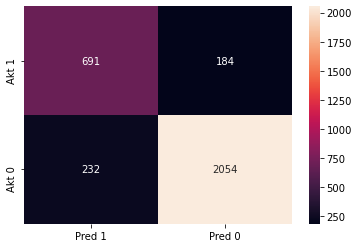

In [63]:
sns.heatmap(df_cm_DT_sm, annot=True, fmt='g')

#### 2. Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

modelRF_sm = RandomForestClassifier()
modelRF_sm.fit(x_train_sm, y_train_sm)
y_predRF_sm = modelRF_sm.predict(x_test)

In [65]:
# Evaluation Matrix for Train
y_trainRF_sm = modelRF_sm.predict(x_train_sm)

acc_trainRF_sm = accuracy_score(y_train_sm, y_trainRF_sm)
prec_trainRF_sm = precision_score(y_train_sm, y_trainRF_sm)
rec_trainRF_sm = recall_score(y_train_sm, y_trainRF_sm)
f1_trainRF_sm =f1_score(y_train_sm, y_trainRF_sm)

In [66]:
# Evaluation matrix for Testing
acc_RF_sm = accuracy_score(y_test, y_predRF_sm)
prec_RF_sm = precision_score(y_test, y_predRF_sm)
rec_RF_sm = recall_score(y_test, y_predRF_sm)
f1_RF_sm =f1_score(y_test, y_predRF_sm)

print(classification_report(y_test, y_predRF_sm))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2286
           1       0.78      0.77      0.78       875

    accuracy                           0.88      3161
   macro avg       0.85      0.84      0.85      3161
weighted avg       0.88      0.88      0.88      3161



In [67]:
RF_sm = {
    'Training':[acc_trainRF_sm, prec_trainRF_sm, rec_trainRF_sm, f1_trainRF_sm],
    'Testing':[acc_RF_sm, prec_RF_sm, rec_RF_sm, f1_RF_sm]
}
pd.DataFrame(data=RF_sm, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.997211,0.876305
Precision,0.997374,0.778161
Recall,0.997047,0.773714
F1-score,0.997210,0.775931


In [68]:
cm_RF_sm = confusion_matrix(y_test, y_predRF_sm, labels=[1,0])
df_cm_RF_sm = pd.DataFrame(data=cm_RF_sm, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_RF_sm

,Pred 1,Pred 0
Akt 1,677,198
Akt 0,193,2093


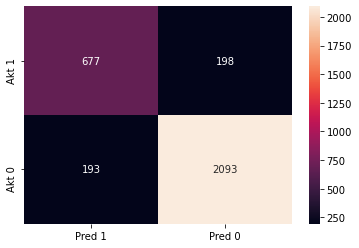

In [69]:
sns.heatmap(df_cm_RF_sm, annot=True, fmt='g')

#### 3. XGBoost

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [71]:
modelXGB_sm = XGBClassifier()
modelXGB_sm.fit(x_train_sm, y_train_sm)
y_predXGB_sm = modelXGB_sm.predict(x_test)

In [72]:
# Evaluation Matrix for Train
y_trainXGB_sm = modelXGB_sm.predict(x_train_sm)

acc_trainXGB_sm = accuracy_score(y_train_sm, y_trainXGB_sm)
prec_trainXGB_sm = precision_score(y_train_sm, y_trainXGB_sm)
rec_trainXGB_sm = recall_score(y_train_sm, y_trainXGB_sm)
f1_trainXGB_sm =f1_score(y_train_sm, y_trainXGB_sm)

In [73]:
# Evaluation Matrix for Testing
acc_XGB_sm = accuracy_score(y_test, y_predXGB_sm)
prec_XGB_sm = precision_score(y_test, y_predXGB_sm)
rec_XGB_sm = recall_score(y_test, y_predXGB_sm)
f1_XGB_sm =f1_score(y_test, y_predXGB_sm)

print(classification_report(y_test, y_predXGB_sm))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2286
           1       0.83      0.87      0.85       875

    accuracy                           0.91      3161
   macro avg       0.89      0.90      0.90      3161
weighted avg       0.92      0.91      0.92      3161



In [74]:
XGB_sm = {
    'Training':[acc_trainXGB_sm, prec_trainXGB_sm, rec_trainXGB_sm, f1_trainXGB_sm],
    'Testing':[acc_XGB_sm, prec_XGB_sm, rec_XGB_sm, f1_XGB_sm]
}
pd.DataFrame(data=XGB_sm, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.963192,0.914900
Precision,0.959822,0.828633
Recall,0.966856,0.873143
F1-score,0.963326,0.850306


In [75]:
cm_XGB_sm = confusion_matrix(y_test, y_predXGB_sm, labels=[1,0])
df_cm_XGB_sm = pd.DataFrame(data=cm_XGB_sm, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_XGB_sm

,Pred 1,Pred 0
Akt 1,764,111
Akt 0,158,2128


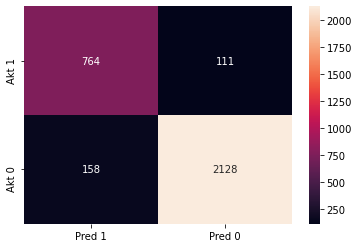

In [76]:
sns.heatmap(df_cm_XGB_sm, annot=True, fmt='g')

#### B. Hyper Parameter Tuning

#### 1. Decision Tree Tuning

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
DT_tuned = DecisionTreeClassifier()
param_DT = {'max_depth':[None, 10, 8],
           'min_samples_split':[2,50,72],
           'min_samples_leaf':[1,25,36],
           'max_features':[None, .4, .3]}

In [49]:
model_DT = GridSearchCV(estimator=DT_tuned, param_grid=param_DT,
                       cv=3,
                       n_jobs=-1,
                        verbose=1,
                        scoring='recall'
                       )

In [50]:
model_DT.fit(x_train_sm, y_train_sm)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:    1.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [None, 10, 8],
                         'm

In [51]:
DT_tuned = model_DT.best_estimator_
DT_tuned

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
y_tunedDT = DT_tuned.predict(x_test)

In [53]:
# Evaluation Matrix for Train
y_trainDT_sm_tuned = DT_tuned.predict(x_train_sm)

acc_trainDT_sm_tuned = accuracy_score(y_train_sm, y_trainDT_sm_tuned)
prec_trainDT_sm_tuned = precision_score(y_train_sm, y_trainDT_sm_tuned)
rec_trainDT_sm_tuned = recall_score(y_train_sm, y_trainDT_sm_tuned)
f1_trainDT_sm_tuned =f1_score(y_train_sm, y_trainDT_sm_tuned)

In [54]:
# Evaluation MAtix for Testing
acc_DT_tuned = accuracy_score(y_test, y_tunedDT)
prec_DT_tuned = precision_score(y_test, y_tunedDT)
rec_DT_tuned = recall_score(y_test, y_tunedDT)
f1_DT_tuned =f1_score(y_test, y_tunedDT)

print(classification_report(y_test, y_tunedDT))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2286
           1       0.71      0.91      0.80       875

    accuracy                           0.87      3161
   macro avg       0.83      0.88      0.85      3161
weighted avg       0.89      0.87      0.87      3161



In [55]:
EvaDT_tuned = {
    'Training':[acc_trainDT_sm_tuned, prec_trainDT_sm_tuned, rec_trainDT_sm_tuned, f1_trainDT_sm_tuned],
    'Testing':[acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned]
}
pd.DataFrame(data=EvaDT_tuned, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.915773,0.870611
Precision,0.888889,0.706560
Recall,0.950339,0.910857
F1-score,0.918587,0.795806


In [56]:
cm_DT_tuned = confusion_matrix(y_test, y_tunedDT, labels=[1,0])
df_cm_DT_tuned = pd.DataFrame(data=cm_DT_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_DT_tuned

,Pred 1,Pred 0
Akt 1,797,78
Akt 0,331,1955


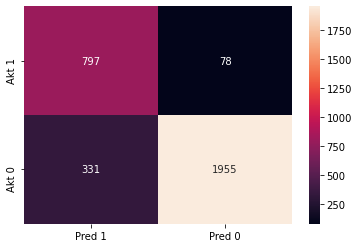

In [57]:
sns.heatmap(df_cm_DT_tuned, annot=True, fmt='g')

In [74]:
import joblib
joblib.dump(DT_tuned, 'ModelSBA_DT_tuned_sm_sample')

['ModelSBA_DT_tuned_sm_sample']

#### 2. Random Forest Tuning

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
RF = RandomForestClassifier()

param_RF = {'n_estimators': [100, 500],
           'max_depth':[None, 15],
           'min_samples_split':[2,82],
           'min_samples_leaf':[1,41],
           'max_features':[None,.4]}

In [81]:
model_RF = GridSearchCV(estimator=RF, param_grid=param_RF ,cv=3, n_jobs=-1, verbose=1, scoring='recall')

In [82]:
model_RF.fit(x_train_sm, y_train_sm)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [83]:
RF_tuned = model_RF.best_estimator_
RF_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=41, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
y_predRF_sm_tuned = RF_tuned.predict(x_test)

In [85]:
# Evaluation Matrix for Train
y_trainRF_sm_tuned = RF_tuned.predict(x_train_sm)

acc_trainRF_sm_tuned = accuracy_score(y_train_sm, y_trainRF_sm_tuned)
prec_trainRF_sm_tuned = precision_score(y_train_sm, y_trainRF_sm_tuned)
rec_trainRF_sm_tuned = recall_score(y_train_sm, y_trainRF_sm_tuned)
f1_trainRF_sm_tuned =f1_score(y_train_sm, y_trainRF_sm_tuned)

In [86]:
# Evaluation Matrix for Testing
acc_RF_sm_tuned = accuracy_score(y_test, y_predRF_sm_tuned)
prec_RF_sm_tuned = precision_score(y_test, y_predRF_sm_tuned)
rec_RF_sm_tuned = recall_score(y_test, y_predRF_sm_tuned)
f1_RF_sm_tuned =f1_score(y_test, y_predRF_sm_tuned)

print(classification_report(y_test, y_predRF_sm_tuned))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2286
           1       0.71      0.93      0.81       875

    accuracy                           0.88      3161
   macro avg       0.84      0.89      0.86      3161
weighted avg       0.90      0.88      0.88      3161



In [87]:
RF_tuned_eva = {
    'Training':[acc_trainRF_sm_tuned, prec_trainRF_sm_tuned, rec_trainRF_sm_tuned, f1_trainRF_sm_tuned],
    'Testing':[acc_RF_sm_tuned, prec_RF_sm_tuned, rec_RF_sm_tuned, f1_RF_sm_tuned]
}
pd.DataFrame(data=RF_tuned_eva, index=['Accuracy','Precision','Recall','F1-score'])

,Training,Testing
Accuracy,0.906202,0.877887
Precision,0.875215,0.714662
Recall,0.947495,0.930286
F1-score,0.909922,0.808342


In [88]:
cm_RF_sm_tuned = confusion_matrix(y_test, y_predRF_sm_tuned, labels=[1,0])
df_cm_RF_sm_tuned = pd.DataFrame(data=cm_RF_sm_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_RF_sm_tuned

,Pred 1,Pred 0
Akt 1,814,61
Akt 0,325,1961


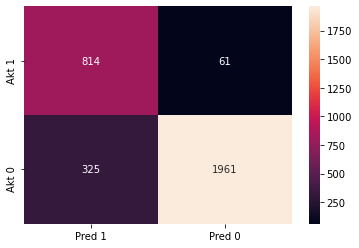

In [89]:
sns.heatmap(df_cm_RF_sm_tuned, annot=True, fmt='g')

In [90]:
import joblib
joblib.dump(RF_tuned, 'ModelSBA_RF_tuned_sm_sample')

['ModelSBA_RF_tuned_sm_sample']

#### XGBoost Tuning

In [37]:
from xgboost import XGBClassifier

In [38]:
XGB_sm = XGBClassifier()

param_XGB = {'n_estimators': [100, 500],
           'max_depth':[None, 15],
           'learning_rate':[0.1, 0.4],
           'colsample_bytree':[None,.3]}

In [39]:
model_XGB = GridSearchCV(estimator=XGB_sm, param_grid=param_XGB, cv=3, n_jobs=-1, verbose=1, scoring='recall')

In [40]:
model_XGB.fit(x_train_sm, y_train_sm)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   55.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [41]:
XGB_tuned = model_XGB.best_estimator_
XGB_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_predXGB_sm_tuned = XGB_tuned.predict(x_test)

In [43]:
# Evaluation Matrix for Train
y_trainXGB_sm_tuned = XGB_tuned.predict(x_train_sm)

acc_trainXGB_sm_tuned = accuracy_score(y_train_sm, y_trainXGB_sm_tuned)
prec_trainXGB_sm_tuned = precision_score(y_train_sm, y_trainXGB_sm_tuned)
rec_trainXGB_sm_tuned = recall_score(y_train_sm, y_trainXGB_sm_tuned)
f1_trainXGB_sm_tuned =f1_score(y_train_sm, y_trainXGB_sm_tuned)

In [44]:
# Evaluation Matrix for Testing
acc_XGB_tuned = accuracy_score(y_test, y_predXGB_sm_tuned)
prec_XGB_tuned = precision_score(y_test, y_predXGB_sm_tuned)
rec_XGB_tuned = recall_score(y_test, y_predXGB_sm_tuned)
f1_XGB_tuned =f1_score(y_test, y_predXGB_sm_tuned)

print(classification_report(y_test, y_predXGB_sm_tuned))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      2286
           1       0.82      0.89      0.85       875

    accuracy                           0.92      3161
   macro avg       0.89      0.91      0.90      3161
weighted avg       0.92      0.92      0.92      3161



In [45]:
cm_XGB_sm_tuned = confusion_matrix(y_test, y_predXGB_sm_tuned, labels=[1,0])
df_cm_XGB_sm_tuned = pd.DataFrame(data=cm_XGB_sm_tuned, columns=['Pred 1', 'Pred 0'], index=['Akt 1', 'Akt 0'])
df_cm_XGB_sm_tuned

,Pred 1,Pred 0
Akt 1,778,97
Akt 0,167,2119


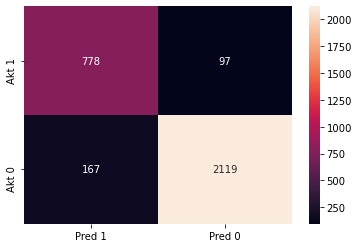

In [46]:
sns.heatmap(df_cm_XGB_sm_tuned, annot=True, fmt='g')

### Evaluation Matrix

#### Tuning Model

In [77]:
eva_mat = {
    'Decision Tree':[acc_DT_sm, prec_DT_sm, rec_DT_sm, f1_DT_sm],
    'Decision Tree Tuned':[acc_DT_tuned, prec_DT_tuned, rec_DT_tuned, f1_DT_tuned],
    'Random Forest':[acc_RF_sm, prec_RF_sm, rec_RF_sm, f1_RF_sm],
    'Random Forest Tuned':[acc_RF_sm_tuned, prec_RF_sm_tuned, rec_RF_sm_tuned, f1_RF_sm_tuned],
    'XGBoost':[acc_XGB_sm, prec_XGB_sm, rec_XGB_sm, f1_XGB_sm],
    'XGBoost tuned':[acc_XGB_tuned, prec_XGB_tuned, rec_XGB_tuned, f1_XGB_tuned]
}

In [78]:
pd.DataFrame(data=eva_mat, index=['Accuracy','Precision','Recall','F1-score'])

,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,XGBoost,XGBoost tuned
Accuracy,0.868396,0.870611,0.876305,0.877570,0.914900,0.916482
Precision,0.748646,0.706560,0.778161,0.713660,0.828633,0.823280
Recall,0.789714,0.910857,0.773714,0.931429,0.873143,0.889143
F1-score,0.768632,0.795806,0.775931,0.808131,0.850306,0.854945


### Predict Proba

In [91]:
pred_proba = RF_tuned.predict_proba(x_test)

In [92]:
### Probability utk Masing-masing kelas
pred_proba

array([[0.99814787, 0.00185213],
       [0.99811242, 0.00188758],
       [0.95116896, 0.04883104],
       ...,
       [0.48209044, 0.51790956],
       [0.94128977, 0.05871023],
       [0.93315874, 0.06684126]])

In [93]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [94]:
y_pred = RF_tuned.predict(x_test)

In [95]:
roc_auc_score(y_test, y_pred)

0.8940579927509061

In [96]:
### Membuat ROC_AUC Curve
y_proba = DT_tuned.predict_proba(x_test)
pred_1 = y_proba[:, 1] #mengambil semua row (:) pada kolom ke 1 (positif) dari y_proba

In [97]:
roc_curve(y_test, pred_1)

#Tiga array, masing-masing array kita masukkan ke variabel (fpr, tpr, threshold)

(array([0.        , 0.0048119 , 0.00568679, 0.00612423, 0.04855643,
        0.04899388, 0.05249344, 0.05336833, 0.055993  , 0.05730534,
        0.05730534, 0.06255468, 0.06255468, 0.06342957, 0.06867892,
        0.06867892, 0.07217848, 0.07480315, 0.07699038, 0.08136483,
        0.08923885, 0.09055118, 0.09098863, 0.09580052, 0.1023622 ,
        0.10411199, 0.10542432, 0.11242345, 0.11636045, 0.11854768,
        0.12598425, 0.12685914, 0.12773403, 0.13429571, 0.1351706 ,
        0.14085739, 0.14304462, 0.1447944 , 0.14873141, 0.15266842,
        0.15485564, 0.17454068, 0.18022747, 0.20647419, 0.20909886,
        0.21084864, 0.21128609, 0.21391076, 0.22265967, 0.22440945,
        0.22790901, 0.23665792, 0.24628171, 0.24890639, 0.2519685 ,
        0.25546807, 0.2567804 , 0.25809274, 0.26202975, 0.27427822,
        0.28302712, 0.30664917, 0.31058618, 0.31102362, 0.31889764,
        0.33289589, 0.34251969, 0.34951881, 0.37882765, 0.3967629 ,
        0.4111986 , 0.41994751, 0.57786527, 0.80

In [98]:
#Masukkan ke dalam 3 variabel
fpr, tpr, threshold = roc_curve(y_test, pred_1)

In [99]:
### AUC = Area under Curve
### AUC paling bagus 1
score_auc = round(auc(fpr, tpr), 2)

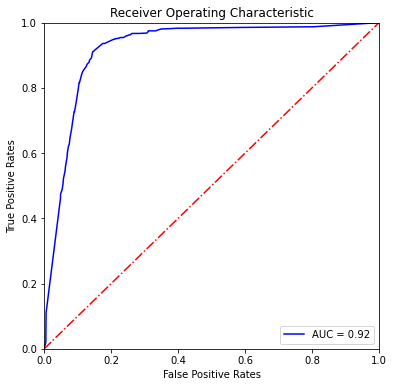

In [100]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, 'b', label=f"AUC = {score_auc}")
plt.plot([0,1], [0,1], 'r-.') #hanya nunjukin garis tengah
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()